<p>
<h1><b><center>Mecánica de Medios Continuos</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 6</center></b><h2>
<h3><b><center>Soluciones a las ecuaciones de Navier-Stokes</center></b><h3>
<h5><center><b>Asignada</b>: 12 de Noviembre de 2023</center><h5>
<h5><center><b>Entrega</b>: 26 de Noviembre de 2023</center><h5>
</p>

<hr/>
<b>Nombre</b>: Manuela Góez Estepa
<br/>
<b>Última actualización</b>: 26 de Noviembre
<hr/>

## Enunciado

**Objetivo**: Ilustrar los campos de velocidad, presión y estrés de algunas soluciones analíticas bien conocidas de las ecuaciones de Navier-Stokes.

**Procedimiento**:

Para cada uno de los problemas a continuación, encontrar los campos mencionados y dibujar diagramas de: campo vectorial de velocidades, líneas de corriente, campo de presiones y campo de esfuerzos usando como referencia el notebook que usamos en clase para representar esos mismos campos en el caso de la solución para el flujo de Stokes alrededor de una esfera y el cálculo correspondiente que hicimos de la fuerza de arrastre.

1. **Flujo alrededor de cilindro**. Resolver las ecuaciones de Navier-Stokes en el caso de los problemas de *cilindro en un corriente cruzada* (página 222, Lautrup, 2011) y el *efecto Magnus* (página 224). Hacer, en ambos casos, diagramas del campo de velocidades y de presión.

2. **Flujo laminar cilíndrico**. Resolver las ecuaciones de Navier-Stokes en el caso de el problema de *flujo laminar cilíndrico* (página 277, Lautrup, 2011). Hacer diagrama del campo de velocidades, campo de presión, estrés. Hacer una animación del movimiento de partículas (particle trajectories) en este caso.

3. **Flujo inducido por gravedad**. Resolver las ecuaciones de Navier-Stokes en el caso de los problemas de *flujo entre placas paralelas inclinadas* y *flujo inclinado con una superficie libre* (página 266, Lautrup, 2011). Hacer diagramas del campo de velocidades y de presión en cada caso.

4. **Flujo en tubería**. Resolver las ecuaciones de Navier-Stokes en el caso de el problema de *flujo laminar en tubería* (página 268, Lautrup, 2011). Hacer diagrama del campo de velocidades y calcular numéricamente el valor de cantidades como Q y U.



**Resultados esperados**:

- Este notebook con el procedimiento debidamente comentado.

- Gráficos esperados:
  - Gráficos de campos vectoriales de velocidades (cuando aplique).
  - Gráficos de líneas de corriente (cuando aplique).
  - Gráficos de contornos del campo de presión (cuando aplique).
  - Gráficos de presión, estrés, velocidad como función de coordenadas (cuando aplique).

- En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

## Solución

#Librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.patches import Circle
import sympy as sp
from sympy import symbols, Function, dsolve, Eq, Derivative

# Cilindro atravesado en un flujo uniforme

Se plantea un flujo uniforme a velocidad $U$ en dirección $\hat{x}$, así $U\equiv(U,0,0) $, luego se coloca un cilindro cuyo eje coincide con el eje $z$.

En este caso hay un potencial asociado a la velocidad $\Psi(x,y)$ que no dependen de $z$, que está relacionada con el campo de velocidad como $v=\nabla\Psi$.

(Antes de continuar con el procedimiento, se aclara que por la simetría del problema es más conveniente tratarlo usando coordenadas cilíndricas $(r,\phi,z)$.)

Asintóticamente, cuando nos alejamos indefinidamente del cilindro, el flujo debe ser aproximadamente uniforme nuevamente. Y dado la linearidad de la ecuación de Laplace implica que el potencial debe comportarse de forma lineal también, de forma que se define que el potencial de velocidad debe ser:

$$\boxed{\Psi = U rcos\phi}$$

Pero para las capas de fluido cercanas al cilindro, se debe cumplir que:

$$\boxed{\Psi = U f(r) cos\phi}$$

Usando la expresión para el Operador Laplaciano en coordenadas cilíndricas [1] y aplicandola en el potencial de velocidad:

\begin{align}
\nabla^2 \Psi &= \left(\frac{\partial^2}{\partial r^2}+\frac{1}{r^2}\frac{\partial^2}{\partial \phi^2}+\frac{\partial^2}{\partial z^2}+\frac{1}{r}\frac{\partial}{\partial r}\right)\Psi \\
&=\frac{\partial^2}{\partial r^2}\Psi+\frac{1}{r^2}\frac{\partial^2}{\partial \phi^2}\Psi+\frac{\partial^2}{\partial z^2}\Psi+\frac{1}{r}\frac{\partial}{\partial r}\Psi \\
&=Ucos\phi\frac{\partial^2}{\partial r^2} f(r) +U f(r)\frac{1}{r^2}\frac{\partial^2}{\partial \phi^2} cos\phi+\frac{\partial^2}{\partial z^2}U f(r) cos\phi+Ucos\phi\frac{1}{r}\frac{\partial}{\partial r} f(r) \\
&=Ucos\phi\frac{\partial^2}{\partial r^2} f(r) -U f(r)\frac{1}{r^2} cos\phi+Ucos\phi\frac{1}{r}\frac{\partial}{\partial r} f(r)
\end{align}

Como el potencial de velocidad satisface la ecuación de Laplace por estarse considerando un fluido incompresible, entonces $\nabla^2\Psi=0$ y se obtiene la ecuación diferencial:

$$\boxed{\frac{d^2}{dr^2}f(r)-\frac{f(r)}{r^2}+\frac{1}{r}\frac{d}{dr}f(r)=0} \ \ \ \ \ \ (1)$$

Recordando que se puede intercambiar derivada parcial y total debido a que $f(r)$ solo depende de la variable independiente $r$.

Con condiciones de frontera $f'(a)=0$ debido a que la velocidad debe anularse en la superficie del cilindro.

In [ ]:
#solución eq diferencial
r, a = symbols("r a")

f = Function("f")(r)
eq = Eq(Derivative(f,r,r)-f/r**2+1/r*Derivative(f,r),0)
sol = dsolve(eq,f,ics={Derivative(f,r).subs(r, a): 0})
sp.simplify(sol)

Eq(f(r), C2*(a**2 + r**2)/r)

Usando la condición del Potencial de velocidad lejano al cilindro, entonces $C_2=1$ y :

$$f(r)=\frac{a^2+r^2}{r}$$

Y el potencial de velocidad tomaría la forma:

$$\boxed{\Psi=U\frac{a^2+r^2}{r}}cos\phi$$

Y el campo de velocidad se recupera como:

\begin{align}
v_r&=\frac{\partial}{\partial r}\Psi\\
&=Ucos\phi\left(1-\frac{a^2}{r^2}\right)\\
v_\phi&=\frac{1}{r}\frac{\partial}{\partial \phi}\Psi\\
&=-Usin\phi\left(1+\frac{a^2}{r^2}\right)\\
\end{align}

In [ ]:
def vfield_cilindro(x,y,z,t,vpars):
  #Parámetros
  U,a=vpars

  #Calcula coordenadas cilindricas
  r=np.sqrt(x**2+y**2)
  phi=np.arctan2(y,x)

  #Componentes cilíndricas de la velocidad
  vr=U*np.cos(phi)*(1-a**2/r**2)
  vphi=-U*np.sin(phi)*(1+a**2/r**2)

  #Vectores unitarios en coordenadas cilíndricas en cartesianas
  er=np.array([np.cos(phi),np.sin(phi),0])
  ephi=np.array([-np.sin(phi),np.cos(phi),0])

  #Velocidad en cartesianas
  v=vr*er+vphi*ephi

  return v

In [ ]:
#Condiciones del problema
U=1
a=0.3
vpars=(U,a)

(-0.825, 0.825, -0.825, 0.825)

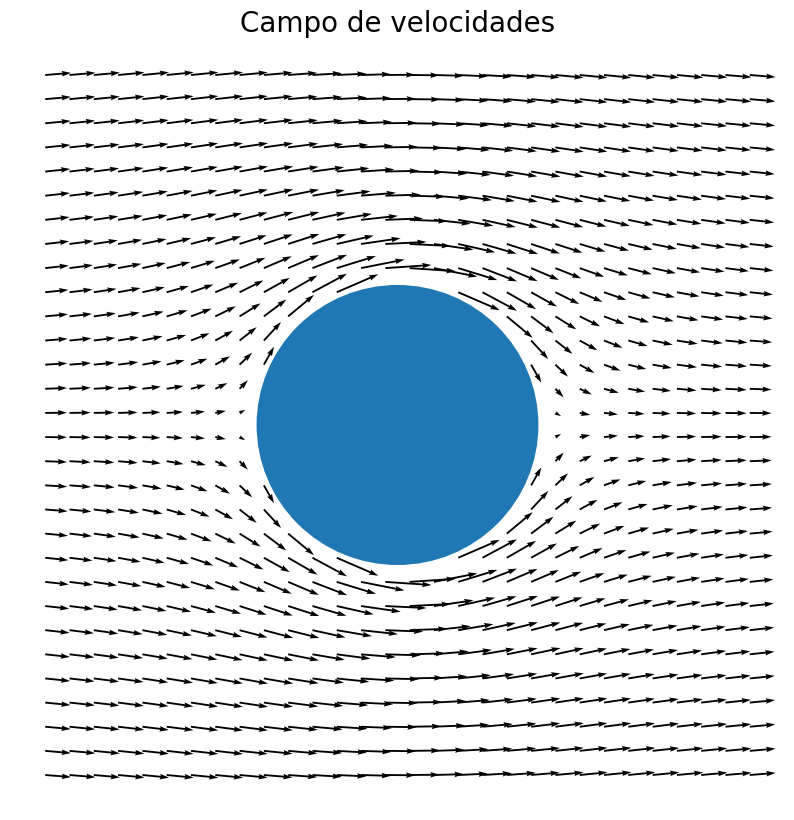

In [ ]:
#Malla rectangular
NG=30
xs=np.linspace(-2.5*a,2.5*a,NG)
ys=np.linspace(-2.5*a,2.5*a,NG)
zs=np.zeros(NG)                         #plano z=0

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

t=0
VXS=np.zeros_like(XS)
VYS=np.zeros_like(XS)
VZS=np.zeros_like(XS)

for i in range(NG):
  for j in range(NG):
    if np.sqrt(YS[i,j]**2+XS[i,j]**2)>=a:
      VXS[i,j],VYS[i,j],VZS[i,j]=vfield_cilindro(XS[i,j],YS[i,j],ZS[i,j],t,vpars)

plt.figure(figsize=(10,10))
plt.title("Campo de velocidades", fontsize= 20)
plt.quiver(XS,YS,VXS,VYS,scale=30)
plt.gca().add_patch(Circle((0,0),a,fill='black'))
plt.axis("off")

Por otra parte, del caso de fluido incompresible se puede usar la expresión para la presión, que despreciando los efectos de la gravedad es:

\begin{align}
p&=\frac{1}{2} \rho_0\left(U^2-v^2\right)\\
&=\frac{1}{2} \rho_0 U^2 \frac{a^2}{r^2}\left(4 \cos ^2 \phi-2-\frac{a^2}{r^2}\right)
\end{align}

(-0.75, 0.75, -0.75, 0.75)

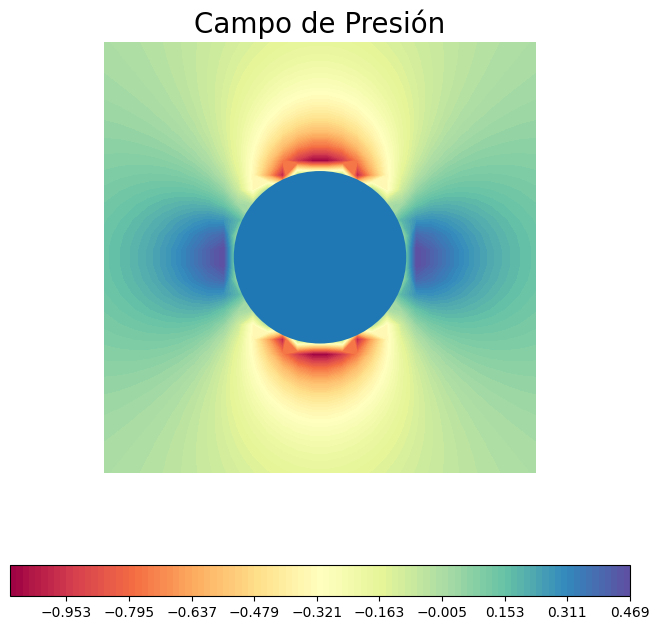

In [ ]:
#Malla rectangular
NG=30
xs=np.linspace(-2.5*a,2.5*a,NG)
ys=np.linspace(-2.5*a,2.5*a,NG)
zs=np.zeros(NG)

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

#Coordenadas cilindricas
RS=np.sqrt(XS**2+YS**2)
PHIS=np.arctan2(YS,XS)

#Presión
rho0 = 1
eta = 1
PS = 1/2 * rho0 * U**2 * a**2 / RS**2 * (4*np.cos(PHIS)**2 - 2 - a**2 / RS**2)

cond = (RS<a)
PS[cond] = 0

# Presión dinámica
# Pd=rho0*U**2/2

plt.figure(figsize=(8,8))
plt.title("Campo de Presión", fontsize= 20)
c=plt.contourf(XS,YS,PS,levels=np.linspace(PS.min(),PS.max(),100),cmap="Spectral")
plt.colorbar(c, orientation="horizontal")
plt.gca().add_patch(Circle((0,0),a,fill='black',zorder=100))
plt.axis("equal")
plt.axis("off")

## Efecto Magnus

Otro caso de estudio interesante es el efecto Magnus que se origina debido a la interacción de un objeto rotando y el flujo del aire alrededor.




Para analizar esta situación también se propone un potencial de velocidad que satisface la ecuación de Laplace, y que tiene la forma:

$$\Psi=C\phi$$

Y el campo de velocidad es [1]:

$$\boxed{v_\phi=\frac{C}{r}}$$

donde $C=\Omega a^2$ con $a$ el radio del cuerpo rotante y $\Omega$ su velocidad angular.

Para el campo de presión se tiene el mismo obtenido en el caso del fluido incompresible (y usado previamente en el cilindro) más el término:

$$\Delta p=\rho_0 U \sin \phi\left(1+\frac{a^2}{r^2}\right) \frac{C}{r}$$

Proporcionado por la contibución cruzada producto de dos campos de velocidad, uno asociado al flujo principal y otro del campo alrededor. Así:

$$\boxed{P=\frac{1}{2} \rho_0 U^2 \frac{a^2}{r^2}\left(4 \cos ^2 \phi-2-\frac{a^2}{r^2}\right)+\rho_0 U \sin \phi\left(1+\frac{a^2}{r^2}\right) \frac{C}{r}}$$

Lo que implica una asimetría en la distribución de la presión con respecto a la variable $\phi$, lo que, en esencia poduce el efecto Magnus.

In [ ]:
def vfield_magnus(x,y,z,t,vpars):
  #Parámetros
  U,a, ang =vpars
  C= ang * a**2

  #Calcula coordenadas esféricas
  r=np.sqrt(x**2+y**2)
  phi=np.arctan2(y,x)

  #Componentes esféricas de la velocidas
  vr=0
  vphi=C/r

  #Vectores unitarios en coordenadas esféricas en cartesianas
  er=np.array([np.cos(phi),np.sin(phi),0])
  ephi=np.array([-np.sin(phi),np.cos(phi),0])

  #Velocidad en cartesianas
  v=vr*er+vphi * phi

  return v

In [ ]:
#condiciones del problema
ang = 2.09 #rad/s   tipico en balon de futbol
U=1
a=0.35
vpars=(U,a, ang)

(-0.7699999999999999,
 0.7699999999999999,
 -0.7699999999999999,
 0.7699999999999999)

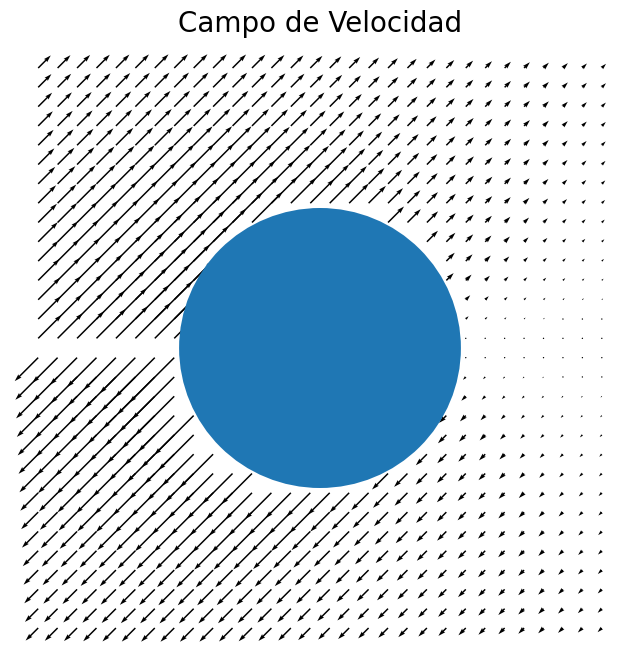

In [ ]:
#Malla rectangular
NG=30
xs=np.linspace(-2*a,2*a,NG)
ys=np.linspace(-2*a,2*a,NG)
zs=np.zeros(NG)                         #plano z=0

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

t=0
VXS=np.zeros_like(XS)
VYS=np.zeros_like(XS)
VZS=np.zeros_like(XS)

for i in range(NG):
  for j in range(NG):
    if np.sqrt(YS[i,j]**2+XS[i,j]**2)>=a:
      VXS[i,j],VYS[i,j],VZS[i,j]=vfield_magnus(XS[i,j],YS[i,j],ZS[i,j],t,vpars)

plt.figure(figsize=(8,8))
plt.title("Campo de Velocidad", fontsize= 20)
plt.quiver(XS,YS,VXS,VYS,scale=30)
plt.gca().add_patch(Circle((0,0),a,fill='black'))
plt.axis("off")

(-0.7, 0.7, -0.7, 0.7)

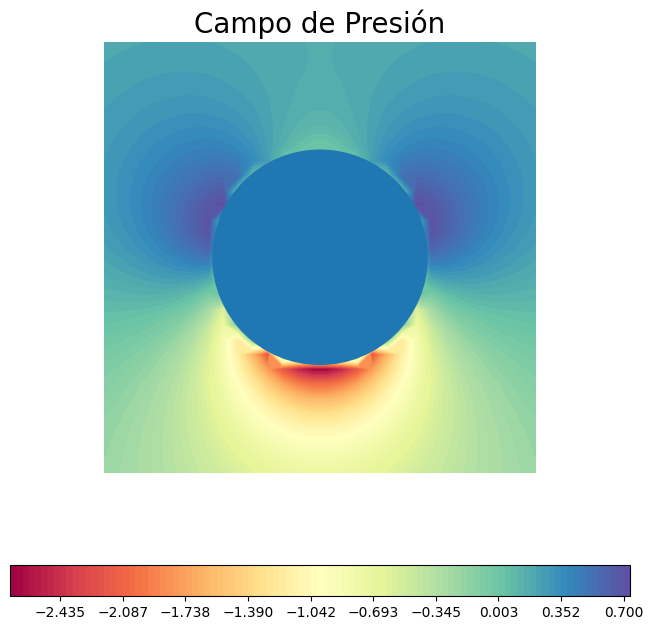

In [ ]:
#Malla rectangular
NG=30
xs=np.linspace(-2*a,2*a,NG)
ys=np.linspace(-2*a,2*a,NG)
zs=np.zeros(NG)

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

#Coordenadas cilindricas
RS=np.sqrt(XS**2+YS**2)
PHIS=np.arctan2(YS,XS)

#Presión
rho0 = 1
eta = 1
PS = 1/2 * rho0 * U**2 * a**2 / RS**2 * (4*np.cos(PHIS)**2 - 2 - a**2 / RS**2)+rho0 * U * np.sin(PHIS) * (1 + a**2/RS**2) * (ang*a**2) /RS

cond = (RS<a)
PS[cond] = 0

# Presión dinámica
# Pd=rho0*U**2/2

plt.figure(figsize=(8,8))
plt.title("Campo de Presión", fontsize= 20)
c=plt.contourf(XS,YS,PS,levels=np.linspace(PS.min(),PS.max(),100),cmap="Spectral")
plt.colorbar(c, orientation="horizontal")
plt.gca().add_patch(Circle((0,0),a,fill='blue',zorder=100))
plt.axis("equal")
plt.axis("off")

# Flujo Laminar cilíndrico

El problema consiste en dos cilíndros coaxiales que rotan cada uno por aparte. Su eje de rotación coincide con el eje $z$ y entre ellos hay una capa de fluido lubricando el movimiento entre ellos.

La ecuación de Navier-Stokes en su forma más general se escribe como:

$$\boxed{\rho\left(\frac{\partial v}{\partial t}+(v \cdot \nabla) v\right)=f-\nabla p+\eta \nabla^2 v+\left(\zeta+\frac{1}{3} \eta\right) \nabla(\nabla \cdot v)}$$

La resolución analítica de esta ecuación presenta dificultades; no obstante, es posible realizar suposiciones sobre el problema para facilitar y simplificar los cálculos.


1.   Supongamos que las propiedades del fluido no experimentan cambios temporales, es decir, que estamos tratando con un fluido estacionario. Esta suposición es razonable en contextos de flujo laminar, donde se puede aproximar que el movimiento del fluido es ordenado. Por lo tanto, $\frac{\partial v}{\partial t}=0$.

2.   Adoptemos la hipótesis de un flujo incompresible, lo que implica que la densidad del fluido se mantiene constante. Aunque la validez de esta aproximación depende de las características específicas del fluido, en este contexto la consideraremos apropiada. Luego, $\left(\zeta+\frac{1}{3} \eta\right) \nabla(\nabla \cdot v)=0$.

3.    En este caso, asumiremos que no hay fuerzas externas a tener en cuenta, lo que significa que podemos despreciar los efectos de la gravedad en el problema y $f=0$.

Finalmente, en el contexto del flujo laminar cilíndrico, la ecuación de Navier-Stokes se expresa de la siguiente manera:

$$\boxed{\rho(v \cdot \nabla) v=-\nabla p+\eta \nabla^2 v} \ \ \ \ \ \ (1)$$

Comencemos analizando la velocidad. Dado que los cilindros, tanto interno como externo, simplemente rotan sin realizar un desplazamiento, podemos inferir que el flujo carece de una componente de velocidad en la dirección z. Además, al tratarse de un flujo incompresible, la rotación inicial no altera la componente radial del fluido. En consecuencia, la velocidad se vuelve puramente tangencial, si bien esta última depende de la posición radial de las capas de fluido.

$$\boxed{\vec{v}=v_\phi(r)\hat{\phi}} \ \ \ \ \ \ (2)$$

El término de la izquierda, se puede reescribir usando la propiedad $(v \cdot \nabla) v = v\cdot (\nabla v)$. Usando coordenadas cilíndricas (base coordenada ortonormal es ($\hat{r},\hat{\phi},\hat{z}$)) sin dependencia en z:

\begin{align}
\nabla \vec{v} &= \left(\hat{r}\frac{\partial}{\partial r}+\hat{\phi}\frac{1}{r}\frac{\partial}{\partial\phi}\right)v_\phi(r)\hat{\phi}\\
&= \hat{r}\hat{\phi}\frac{\partial}{\partial r}v_\phi(r)+\hat{\phi}\frac{v_\phi(r)}{r}\frac{\partial}{\partial r}\hat{\phi}\\
&= \hat{r}\hat{\phi}\frac{\partial}{\partial r}v_\phi(r)-\hat{\phi}\hat{r}\frac{v_\phi(r)}{r}
\end{align}

Donde se usó que en coordenadas cilíndricas $\frac{\partial}{\partial r}\hat{\phi}=-\hat{r}$,. Luego:

\begin{align}
\vec{v}\cdot (\nabla \vec{v}) &= v_\phi(r)\hat{\phi}\cdot\left(\hat{r}\hat{\phi}\frac{\partial}{\partial r}v_\phi(r)-\hat{\phi}\hat{r}\frac{v_\phi(r)}{r}\right)\\
&= v_\phi(r)(\hat{\phi}\cdot\hat{r})\hat{\phi}\frac{\partial}{\partial r}v_\phi(r)-v_\phi(r)(\hat{\phi}\cdot\hat{\phi})\hat{r}\frac{v_\phi(r)}{r}\\
&= -v_\phi(r)\hat{r}\frac{v_\phi(r)}{r}
\end{align}

$$\boxed{\vec{v}\cdot (\nabla \vec{v})=-\hat{r}\frac{v_\phi(r)^2}{r}} \ \ \ \ \ \ (3)$$

En el primer término del lado derecho de la ecuación $(1)$ se tiene en como la presión no tiene dependencia de la componente tangencial, entonces:

$$\boxed{\nabla \vec{p}=\hat{r}\frac{\partial \vec{p}}{\partial r}+\hat{z}\frac{\partial \vec{p}}{\partial z}} \ \ \ \ \ \ (4)$$

Para desarrollar el segundo término, se tiene que por definición $\nabla^2 \vec{v} =\nabla \cdot(\nabla  \vec{v})$

\begin{align}
\nabla^2 \vec{v} &= \left(\hat{r}\frac{\partial}{\partial r}+\hat{\phi}\frac{1}{r}\frac{\partial}{\partial\phi}\right)\cdot \left(\hat{r}\hat{\phi}\frac{\partial}{\partial r}v_\phi(r)-\hat{\phi}\hat{r}\frac{v_\phi(r)}{r}\right)\\
&= \hat{r}\frac{\partial}{\partial r}\left(\hat{r}\hat{\phi}\frac{\partial}{\partial r}v_\phi(r)\right)-\hat{r}\frac{\partial}{\partial r}\left(\hat{\phi}\hat{r}\frac{v_\phi(r)}{r}\right)+\hat{\phi}\frac{1}{r}\frac{\partial}{\partial\phi}\left(\hat{r}\hat{\phi}\frac{\partial}{\partial r}v_\phi(r)\right)-\hat{\phi}\frac{1}{r}\frac{\partial}{\partial\phi}\left(\hat{\phi}\hat{r}\frac{v_\phi(r)}{r}\right)\\
&= \hat{\phi}\frac{\partial^2}{\partial r^2}v_\phi(r)+\hat{\phi}\frac{1}{r}\frac{\partial}{\partial}v_\phi(r)-\hat{\phi}\frac{v_\phi(r)}{r^2}\\
&= \hat{\phi}\frac{d}{dr}\left(\frac{1}{r}\frac{d}{dr}(r v_\phi(r)) \right)
\end{align}

$$\boxed{\nabla^2 \vec{v}=\hat{\phi}\frac{d}{dr}\left(\frac{1}{r}\frac{d}{dr}(r v_\phi(r)) \right)} \ \ \ \ \ \ (5)$$

Reemplazando $(3),(4),(5)$ en $(1)$:

$$\rho\left(-\hat{r}\frac{v_\phi(r)^2}{r}\right)=-\left(\hat{r}\frac{\partial \vec{p}}{\partial r}+\hat{z}\frac{\partial \vec{p}}{\partial z}\right)+\eta \hat{\phi}\frac{d}{dr}\left(\frac{1}{r}\frac{d}{dr}(r v_\phi(r)) \right)$$

Separando las ecuaciones por componentes:

\begin{align}
-\hat{r}\rho\frac{v_\phi(r)^2}{r} &= -\hat{r}\frac{\partial \vec{p}}{\partial r} \\
0 &= \eta \frac{d}{dr}\left(\frac{1}{r}\frac{d}{dr}(r v_\phi(r)) \right) \\
0 &= -\frac{\partial \vec{p}}{\partial z}
\end{align}

La solución para el campo de velocidades usando que la velocidad de rotación del cilindro interno de radio $a$ es $v_\phi(a)=a\Omega$ y que en este momento, el cilindro externo no tiene movimiento $v_\phi(b)=0$, entonces:

$$\boxed{v_\phi=\frac{\Omega a^2}{r}\frac{b^2-r^2}{b^2-a^2}}$$

Solución tomada de [1].




In [ ]:
def vfield_laminar_cilindrico(x,y,z,t,vpars):
  """Calcula el campo de velocidades donde a es el tamaño del cilindro interno
  y b es el del externo, en este caso solo se considera que el interno es el que
  está rotando."""

  #Parámetros
  Omega,a,b = vpars

  #Calcula coordenadas cilindricas
  r=np.sqrt(x**2+y**2)
  phi=np.arctan2(y,x)

  #Componentes cilíndricas de la velocidad
  vr = 0
  vphi = Omega * a**2 / r * (b**2-r**2) / (b**2 - a**2)

  #Vectores unitarios en coordenadas cilíndricas en cartesianas
  er=np.array([np.cos(phi),np.sin(phi),0])
  ephi=np.array([-np.sin(phi),np.cos(phi),0])

  #Velocidad en cartesianas
  v=vr*er+vphi*ephi
  return v

In [ ]:
#Condiciones del problema

Omega = 2 #vel angular
a = 3
b = 10

vpars=(Omega,a,b)

(-11.0, 11.0, -11.0, 11.0)

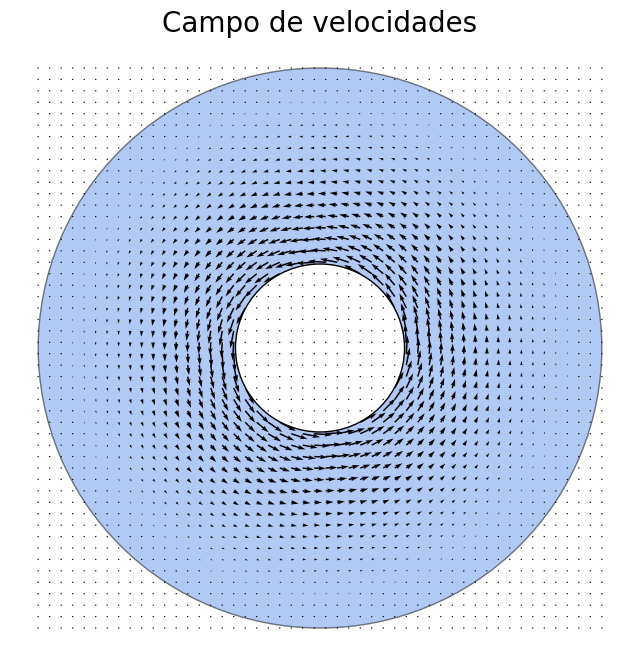

In [ ]:
#Malla rectangular
NG=50
xs=np.linspace(-b,b,NG)
ys=np.linspace(-b,b,NG)
zs=np.zeros(NG)                         #plano z=0

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

t=0
VXS=np.zeros_like(XS)
VYS=np.zeros_like(XS)
VZS=np.zeros_like(XS)

for i in range(NG):
  for j in range(NG):
    if np.sqrt(YS[i,j]**2+XS[i,j]**2)<=b and np.sqrt(YS[i,j]**2+XS[i,j]**2)>=a:
      VXS[i,j],VYS[i,j],VZS[i,j]=vfield_laminar_cilindrico(XS[i,j],
                                                           YS[i,j],
                                                           ZS[i,j],
                                                           t,vpars)

plt.figure(figsize=(8,8))
plt.title("Campo de velocidades", fontsize= 20)
plt.gca().add_patch(Circle((0,0),b,edgecolor='black', facecolor = "cornflowerblue", alpha = 0.5))
plt.gca().add_patch(Circle((0,0),a,edgecolor='black', facecolor = "white"))
plt.quiver(XS,YS,VXS,VYS,scale=200)
plt.axis("off")

El campo de presión para este caso es:

$$\boxed{p = p_0 + \frac{1}{2}\rho_0\left(\frac{\Omega a^2}{b^2 - a^2}\right)^2 \left(r^2 - \frac{b^4}{r^2} + 4 b^2 log \frac{b}{r}\right)}$$

(-10.0, 10.0, -10.0, 10.0)

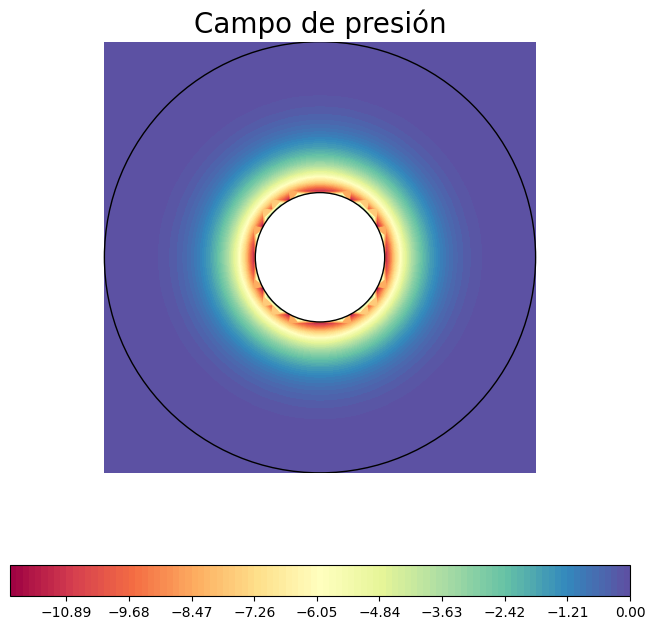

In [ ]:
#Malla rectangular
xs=np.linspace(-b,b,NG)
ys=np.linspace(-b,b,NG)
zs=np.zeros(NG)

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

#Coordenadas cilindricas
RS=np.sqrt(XS**2+YS**2)
PHIS=np.arctan2(YS,XS)

#Presión
rho0 = 1
p0 = 0
eta = 1
PS = p0 + 1/2 * rho0 * (Omega*a**2 / (b**2 - a**2))**2 * (RS**2 - b**4 / RS**2 + 4 * b**2 *np.log(b/RS))

cond1 = (RS<a); cond2 = (RS>b)
PS[cond1] = 0; PS[cond2] = 0


plt.figure(figsize=(8,8))
plt.title("Campo de presión", fontsize= 20)
c=plt.contourf(XS,YS,PS,levels=np.linspace(PS.min(),PS.max(),100),
               cmap="Spectral")
plt.gca().add_patch(Circle((0,0),b,edgecolor='black', fill=False))
plt.gca().add_patch(Circle((0,0),a,edgecolor='black',facecolor = "white"))
plt.colorbar(c, orientation = "horizontal")
plt.axis("equal")
plt.axis("off")

Recordemos que el estrés indicialmente es:

$$\sigma_{ij}=-\rho \delta_{ij}+\eta(\nabla_i v_j + \nabla_j v_i)$$

Note que todas las componentes del tensor de esfuerzo que involucran la componente $z$ se anulan, ya que la velocidad solo tiene componente en $\hat{\phi}$, por lo que solo sobrevive la componente $\sigma_{\phi r}$.

\begin{align}
\sigma_{\phi r}&=\eta(\nabla_\phi v_r + \nabla_r v_\phi)\\
&= \eta \nabla_r v_\phi \\
&= \eta \left(\frac{d v_\phi}{dr}-\frac{v_\phi}{r}\right)
\end{align}

Con la definión obtenida con anterioridad: $\ \ \ \boxed{v_\phi=\frac{\Omega a^2}{r}\frac{b^2-r^2}{b^2-a^2}}$, se obtiene:

$$\boxed{\sigma_{\phi r}=-\frac{2\eta\Omega}{r^2}\frac{a^2b^2}{b^2-a^2}}$$

(-10.0, 10.0, -10.0, 10.0)

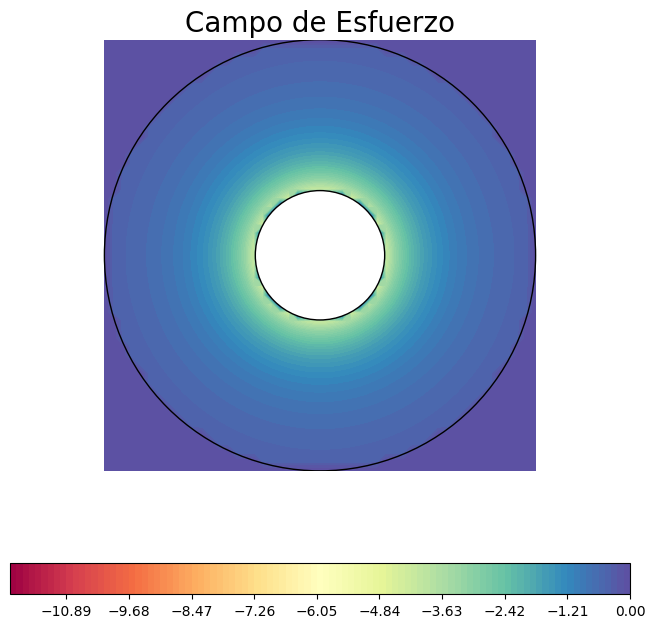

In [ ]:
#Malla rectangular
xs=np.linspace(-b,b,NG)
ys=np.linspace(-b,b,NG)
zs=np.zeros(NG)

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

#Coordenadas cilindricas
RS=np.sqrt(XS**2+YS**2)
PHIS=np.arctan2(YS,XS)

#Estres
sigma = -2*eta*Omega/RS**2 *(a**2*b**2)/(b**2-a**2)

cond1 = (RS<a); cond2 = (RS>b)
sigma[cond1] = 0; sigma[cond2] = 0


plt.figure(figsize=(8,8))
plt.title("Campo de Esfuerzo", fontsize= 20)
c=plt.contourf(XS,YS,sigma,levels=np.linspace(PS.min(),PS.max(),100),cmap="Spectral")
plt.gca().add_patch(Circle((0,0),b,edgecolor='black', fill=False))
plt.gca().add_patch(Circle((0,0),a,edgecolor='black',facecolor = "white"))
plt.colorbar(c, orientation = "horizontal")
plt.axis("equal")
plt.axis("off")

# Flujo inducido por Gravedad




## Con dos placas
El problema consiste en considerar un fluido entre dos placas paralelas inclinadas a un ángulo $\theta$, lo que da lugar a la generación de un flujo descendente debido a la fuerza de la gravedad.

La ecuación de Navier-Stokes en su forma más general se escribe como:

$$\boxed{\rho\left(\frac{\partial v}{\partial t}+(v \cdot \nabla) v\right)=f-\nabla p+\eta \nabla^2 v+\left(\zeta+\frac{1}{3} \eta\right) \nabla(\nabla \cdot v)}$$

Para este caso en específico vamos a hacer las siguientes suposiciones:

1. Si el fluido es incompresible  $\left(\zeta+\frac{1}{3} \eta\right) \nabla(\nabla \cdot v)=0$.

2. Si el fluido es estacionario $\frac{\partial v}{\partial t}=0$.

3. Consideremos que los efectos de viscosidad son dominantes sobre los advectivos, entonces se puede despreciar el término relacionado con la aceleración advectiva, tal que $(v \cdot \nabla) v=0$.

Luego la ecuación de Navier-Stokes queda:

$$\boxed{0=f-\nabla p+\eta \nabla^2 v} \ \ \ \ \ \ (1)$$

\vec{v}\cdot(\nabla \vec{v})=(v \cdot \nabla) v


Primero, seleccionemos un sistema de coordenadas en el cual el eje $x$ sea paralelo a los planos (en la mitad entre las placas) y el eje $y$ sea perpendicular a ellos.

En este caso, resulta más conveniente utilizar coordenadas cartesianas. Ahora, analicemos en primer lugar la fuerza externa que está induciendo el flujo, la cual es la gravedad. Dado que esta fuerza se dirige hacia abajo, podemos descomponerla en dos componentes:

\begin{align}
f_x &= g \ sin \theta \\
f_y &= -g \ cos \theta
\end{align}

Para el término $\nabla p$, se puede usar la aproximación de la presión en una columna que se usaba en fluidos incompresibles (y teniendo en cuenta que solo hay presión en el ejevertical $y$):

$$\boxed{\nabla_y p = -\rho_0 \  g \ cos\theta}\ \ \ \ \ \ (2)$$

La anterior equación tiene solución analítica $p=p_0(x)-\rho_0 \ g \ y \cos\theta$. Para la componente en x, se tiene que:

$$\nabla_x p_0 = \rho_0 \  g \ sin \theta + \eta \nabla_y^2 v_x(y)$$

Recordando la definición de viscosidad cinemática $\nu=\frac{\eta}{\rho_0}$:

$$\boxed{\frac{1}{\rho_0}\nabla_x p_0 =  \  g \ sin \theta + \nu \nabla_y^2 v_x(y) }\ \ \ \ \ \ (3)$$

Aproximando que la presión es constante sobre el eje x, y bajo la condición de _no-slip_ la velocidad en las placas es nula.

Condiciones de frontera:

\begin{align}
v_x(-d) &= 0 \\
v_x(d) &= 0 \\
\end{align}



In [ ]:
#solución eq diferencial
y, x, rho, g, theta, nu, d, L, U = symbols("y x rho g theta nu d L U")

v = Function("v_x")(y)
eq = Eq(g * sp.sin(theta) +  nu* Derivative(v,y,y),0)
sol = dsolve(eq,v,ics={v.subs(y, -d): 0, v.subs(y, d): 0})
sp.simplify(sol)

Eq(v_x(y), g*(d**2 - y**2)*sin(theta)/(2*nu))

La solución permanece como:

$$\boxed{v_x =  \frac{g \ sin \theta}{2\nu}(d^2-y^2)}$$

In [ ]:
def vfield_placas(x,y,z,t,vpars):
  """Calcula el campo de velocidades donde hay dos placas y un fluido en
  medio que fluye por gravedad."""

  #Parámetros
  theta,d,nu,g = vpars

  #Componentes cilíndricas de la velocidad
  vx = g*np.sin(theta) / (2*nu) * (d**2 - y**2)

  #Vectores unitarios en coordenadas cartesianas
  ex=np.array([1,0,0])

  return vx*ex

In [ ]:
#Condiciones del problema
theta = np.pi/6      #45°
d = 1                #m
nu = 0.5
g= 9.81              #m/s
L= 8                 #m

vpars=(theta,d,nu,g)

(-0.9214101615137754, 8.349613391789285, -5.77327948354173, 1.4846043489469172)

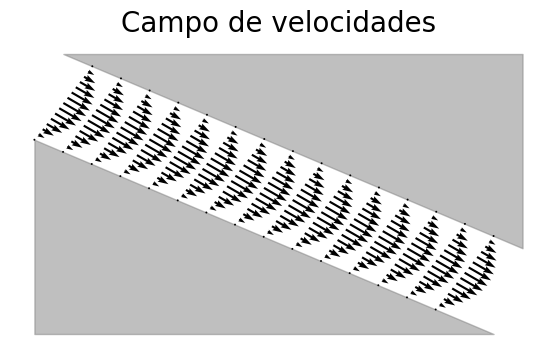

In [ ]:
#se hacen los calculos con respecto al sistema ya inclinado
#y luego se rota para verlo desde un plano no inclinado

#Malla rectangular
NG=15
xs=np.linspace(0,L,NG)
ys=np.linspace(-d,d,NG)
zs=np.zeros(NG)                         #plano z=0 (entrando a la pantalla)

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

t=0
VXS=np.zeros_like(XS)
VYS=np.zeros_like(XS)
VZS=np.zeros_like(XS)

for i in range(NG):
  for j in range(NG):
    if YS[i,j]>=-d and YS[i,j]<=d:
      VXS[i,j],VYS[i,j],VZS[i,j]=vfield_placas(XS[i,j],YS[i,j],ZS[i,j],t,vpars)

#cambiando al sistema no rotado
XSP = XS * np.cos(theta)+ YS * np.sin(theta)
YSP = -XS * np.sin(theta)+ YS * np.cos(theta)
VXSP = VXS * np.cos(theta)+ VYS * np.sin(theta)
VYSP = -VXS * np.sin(theta)+ VYS * np.cos(theta)

#pendiente
m = (YSP[0,0]-YSP[0,-1])/(XSP[0,0]-XSP[0,-1])
xsp = xs * np.cos(theta)+ ys * np.sin(theta)
ysp = -xs * np.sin(theta)+ ys * np.cos(theta)

plt.figure(figsize=(L*np.cos(theta),L*np.sin(theta)))
plt.title("Campo de velocidades", fontsize= 20)
plt.fill_between(xsp,min(m*xsp-d/np.cos(theta)),
                 m*xsp-d/np.cos(theta),color="gray",alpha=0.5)
plt.fill_between(xsp+d*np.sin(theta),m*xsp+d*np.cos(theta),
                 max(m*xsp+d*np.cos(theta)),color="gray",alpha=0.5)
plt.quiver(XSP,YSP,VXSP,VYSP,scale=100)
plt.axis("off")

(0.49999999999999994, 6.295602768807579, -5.77327948354173, 1.4846043489469172)

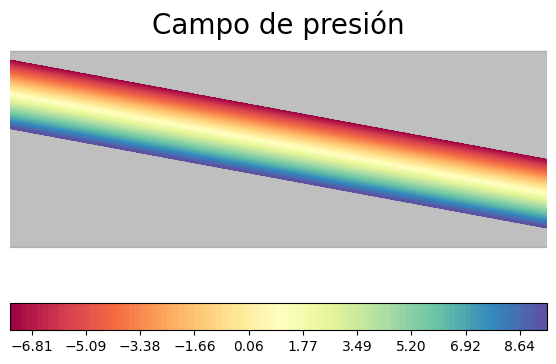

In [ ]:
#se hacen los calculos con respecto al sistema ya inclinado
#y luego se rota para verlo desde un plano no inclinado

#Malla rectangular
NG=15
xs=np.linspace(0,L,NG)
ys=np.linspace(-d,d,NG)
zs=np.zeros(NG)                         #plano z=0 (entrando a la pantalla)

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

#cambiando al sistema no rotado
XSP = XS * np.cos(theta)+ YS * np.sin(theta)
YSP = -XS * np.sin(theta)+ YS * np.cos(theta)

#Presión
rho0 = 1
p0 = 1
PS = p0 - rho0*g*YS*np.cos(theta)



#pendiente
m = (YSP[0,0]-YSP[0,-1])/(XSP[0,0]-XSP[0,-1])
xsp = xs * np.cos(theta)+ ys * np.sin(theta)

plt.figure(figsize=(L*np.cos(theta),L*np.sin(theta)))
plt.title("Campo de presión", fontsize= 20)
plt.fill_between(xsp,min(m*xsp-d/np.cos(theta)),
                 m*xsp-d/np.cos(theta),color="gray",alpha=0.5)
plt.fill_between(xsp+d*np.sin(theta),m*xsp+d*np.cos(theta),
                 max(m*xsp+d*np.cos(theta)),color="gray",alpha=0.5)
c=plt.contourf(XSP,YSP,PS,levels=np.linspace(PS.min(),PS.max(),100),
               cmap="Spectral")
plt.colorbar(c, orientation = "horizontal")
plt.xlim(d*np.sin(theta),xsp[-3])
plt.axis("off")

## Con solo la placa inferior

Este problema consiste en un flujo inducido por gravedad pero sin la placa superior, note que ésto lo que hace es cambiar la condición de frontera, en donde esa placa ya no restringe el movimiento del fluido, y alcanzaría la velocidad máxima en la parte superior del fluido.

La ecuación difrencial continúa siendo

$$\boxed{\frac{1}{\rho_0}\frac{d}{dx} p_0 =  \  g \ sin \theta + \nu \frac{d^2}{dy^2} v_x(y) }$$

Aproximando que la presión es constante sobre el eje x, y bajo la condición de _no-slip_ la velocidad en las placa inferior es nula.

Condiciones de frontera:

\begin{align}
v_x(-d) &= 0 \\
v_x(0) &= U_{max} \\
\end{align}

Nota: El campo de presión es equivalente al del caso anterior con dos placas.

In [ ]:
#solución eq diferencial
y, x, rho, g, theta, nu, d, L, U = symbols("y x rho g theta nu d L U_{max}")

v = Function("v_x")(y)
eq = Eq(g * sp.sin(theta) +  nu* Derivative(v,y,y),0)
sol = dsolve(eq,v,ics={v.subs(y, -d): 0,  v.subs(y, 0): U})
sp.simplify(sol)

Eq(v_x(y), U_{max} + U_{max}*y/d - d*g*y*sin(theta)/(2*nu) - g*y**2*sin(theta)/(2*nu))

In [ ]:
def vfield_placa(x,y,z,t,vpars):
  """Calcula el campo de velocidades donde hay dos placas y un fluido en
  medio que fluye por gravedad."""

  #Parámetros
  theta,d,nu,g, U = vpars

  #Componentes cilíndricas de la velocidad
  vx = U+ U*y/d - g*y*np.sin(theta)/(2*nu) * (d+y)

  #Vectores unitarios en coordenadas cartesianas
  ex=np.array([1,0,0])

  return vx*ex

In [ ]:
#Condiciones del problema
theta = np.pi/6      #45°
d = 1                #m
nu = 0.5
g= 9.81              #m/s²
L= 8                 #m
Umax = 7             #m/s

vpars=(theta,d,nu,g, Umax)

(-0.8714101615137755,
 7.299613391789285,
 -5.412435565298213,
 0.25773502691896255)

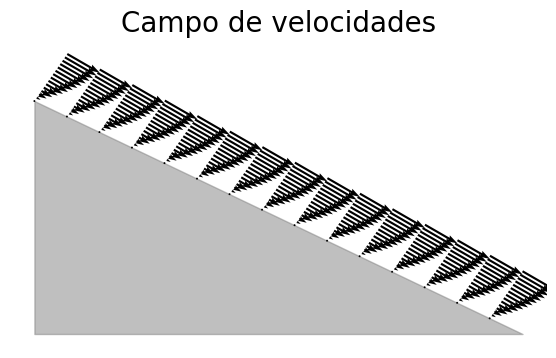

In [ ]:
#Malla rectangular
NG=15
xs=np.linspace(0,L,NG)
ys=np.linspace(-d,0,NG)
zs=np.zeros(NG)                         #plano z=0 (entrando a la pantalla)

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

t=0
VXS=np.zeros_like(XS)
VYS=np.zeros_like(XS)
VZS=np.zeros_like(XS)

for i in range(NG):
  for j in range(NG):
    VXS[i,j],VYS[i,j],VZS[i,j]=vfield_placa(XS[i,j],YS[i,j],ZS[i,j],t,vpars)

#cambiando al sistema no rotado
XSP = XS * np.cos(theta)+ YS * np.sin(theta)
YSP = -XS * np.sin(theta)+ YS * np.cos(theta)
VXSP = VXS * np.cos(theta)+ VYS * np.sin(theta)
VYSP = -VXS * np.sin(theta)+ VYS * np.cos(theta)

#pendiente
m = (YSP[0,0]-YSP[0,-1])/(XSP[0,0]-XSP[0,-1])
xsp = xs * np.cos(theta)+ ys * np.sin(theta)
ysp = -xs * np.sin(theta)+ ys * np.cos(theta)

#------------------------------------------------------
plt.figure(figsize=(L*np.cos(theta),L*np.sin(theta)))
plt.title("Campo de velocidades", fontsize= 20)
plt.fill_between(xsp,min(m*xsp-d/np.cos(theta)),
                 m*xsp-d/np.cos(theta),color="gray",alpha=0.5)
plt.quiver(XSP,YSP,VXSP,VYSP,scale=100)
plt.axis("off")

(-0.49999999999999994, 6.92820323027551, -5.412435565298213, 0.0)

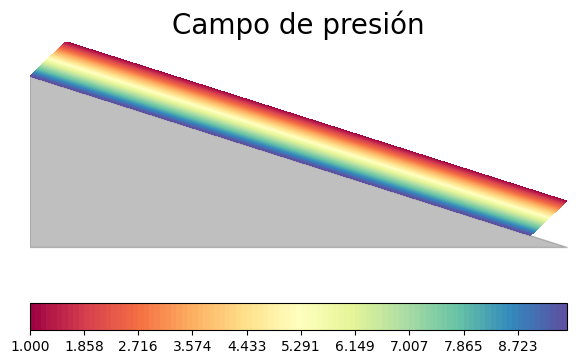

In [ ]:
#Malla rectangular
NG=15
xs=np.linspace(0,L,NG)
ys=np.linspace(-d,0,NG)
zs=np.zeros(NG)                         #plano z=0 (entrando a la pantalla)

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

#cambiando al sistema no rotado
XSP = XS * np.cos(theta)+ YS * np.sin(theta)
YSP = -XS * np.sin(theta)+ YS * np.cos(theta)

#Presión
rho0 = 1
p0 = 1
PS = p0 - rho0*g*YS*np.cos(theta)

#pendiente
m = (YSP[0,0]-YSP[0,-1])/(XSP[0,0]-XSP[0,-1])
xsp = xs * np.cos(theta)+ ys * np.sin(theta)

plt.figure(figsize=(L*np.cos(theta),L*np.sin(theta)))
plt.title("Campo de presión", fontsize= 20)
plt.fill_between(xsp,min(m*xsp-d/np.cos(theta)),
                 m*xsp-d/np.cos(theta),color="gray",alpha=0.5)
c=plt.contourf(XSP,YSP,PS,levels=np.linspace(PS.min(),PS.max(),100),
               cmap="Spectral")
plt.colorbar(c, orientation = "horizontal")
#plt.xlim(d*np.sin(theta),xsp[-3])
plt.axis("off")

# Flujo en tubería

El problema de la tubería consiste en un flujo que atraviesa un tubo muy largo, donde, por facilidad, se elige el eje $z$ y el eje del cilindro coinciden.

La ecuación de Navier-Stokes completa se escribe como:

$$\boxed{\rho\left(\frac{\partial v}{\partial t}+(v \cdot \nabla) v\right)=f-\nabla p+\eta \nabla^2 v+\left(\zeta+\frac{1}{3} \eta\right) \nabla(\nabla \cdot v)}$$

Análisis e hipótesis:

1.   El fluido es estacionario, no cambia a lo largo del tiempo $\frac{\partial v}{\partial t}=0$.

2.   El fluido es aproximadamente incompresible, por tanto las fluctuaciones de densidad son despreciables y $\left(\zeta+\frac{1}{3} \eta\right) \nabla(\nabla \cdot v)=0$.

3.    Aunque estemos trabajando con el eje $z$, no asumimos que esa orientación sea vertical, ni que hayan fuerzas externas relevantes $f=0$.

4. Asumimos que en este caso la viscosidad domina sobre el término advectivo, de modo que $(v \cdot \nabla) v$.

Por ende, la ecuación de Navier-Stokes se simplifica como:

$$\boxed{0=-\nabla p+\eta \nabla^2 v} \ \ \ \ \ \ (1)$$

Como ya se comentó previamente, el eje del tubo coincide con el eje $z$, como se está tratando con una tubería, entonces se hace la aproximación que el flujo solo se desplaza en dirección $z$ y que las capas del fluido tampoco cambian de posición radial. Así:

$$\boxed{\vec{v}=v_z(r)\hat{z}} \ \ \ \ \ \ (2)$$

Por la geometría del problema, es conveniente usar coordenadas cilíndricas (base coordenada ortonormal ($\hat{r},\hat{\phi},\hat{z}$)) para escribir los términos $\nabla p$ y $\nabla ^2 v$. Recordemos que para el laplaciano (p.622)[1]:

\begin{align}
\nabla^2 \vec{v} &= \left(\frac{\partial^2}{\partial r^2}+\frac{1}{r^2}\frac{\partial^2}{\partial\phi^2}+\frac{\partial^2}{\partial z^2}+\frac{1}{r}\frac{\partial}{\partial z}\right)v_z(r)\hat{z}\\
&= \left(\frac{\partial^2}{\partial r^2}v_z(r)+\frac{1}{r}\frac{\partial}{\partial z}v_z(r)\right)\hat{z}
\end{align}

Donde solo permanecen los derivadas dependientes de $r$ que es la única variable de la que depende $v(z)$. Además, como el este caso, la presión solo va a depender del z, entonces la ecuación (1) queda como:

$$\boxed{\frac{d}{dz}p=\eta\left(\frac{d^2}{d r^2}v_z(r)+\frac{1}{r}\frac{d}{d z}v_z(r)\right)} \ \ \ \ \ \ (3)$$

 En la referencia [1] se propone separar las ecuaciones como:

 \begin{align}
 \frac{d}{dz}p&=-G\\
 \eta\left(\frac{d^2}{d r^2}v_z(r)+\frac{1}{r}\frac{d}{d z}v_z(r)\right)&=-G
 \end{align}

Condiciones de frontera:

Se escoge la condición de _no-slip_ entonces en la superficie del tubo $v_z(a)=0$ para $a$ el radio del mismo

In [ ]:
#solución eq diferencial
eta, r, z, G, a = symbols("eta r z G a")

v = Function("v_z")(r)
eq = Eq(eta*(Derivative(v,r,r)+1/r*Derivative(v,r)),-G)
sol = dsolve(eq,v,ics={v.subs(r, a): 0})
sp.simplify(sol)

Eq(v_z(r), (4*C2*eta*(-log(a) + log(r)) + G*a**2 - G*r**2)/(4*eta))

Como $\lim\limits_{r \to 0} \ log(r)= \infty$, entonces se escoge $C_2=0$ para establecer que en el medio del tubo, la velocidad del fluido no es infinita.


$$\boxed{v_z(r)=\frac{G}{4η}(a^2-r^2)}$$

Para un tuvo finito de longitud $L$ la constante $G=\frac{△ p}{L}$ corresponde al gradiente de presión con $△p$ la diferencia de presión entre la entrada y salida del tubo.

In [ ]:
def vfield_tuberia(x,y,z,t,vpars):
  #Parámetros
  G, eta , a =vpars

  #Calcula coordenadas cilindricas
  r=np.sqrt(x**2+y**2)

  #Componentes esfericas de la velocidad
  vz = G / (4*eta) * (a**2 - r**2)

  #Vectores unitarios en coordenadas esfericas en cartesianas
  ez= np.array([0,0,1])

  #Velocidad en cartesianas
  v=vz * ez

  return v

In [ ]:
#condiciones del problema
caida_p = 200           #pa
L = 10                #m

G = caida_p / L
eta = 2
a = 1
vpars=(G,eta,a)

(-0.5, 10.5, -1.1, 1.1)

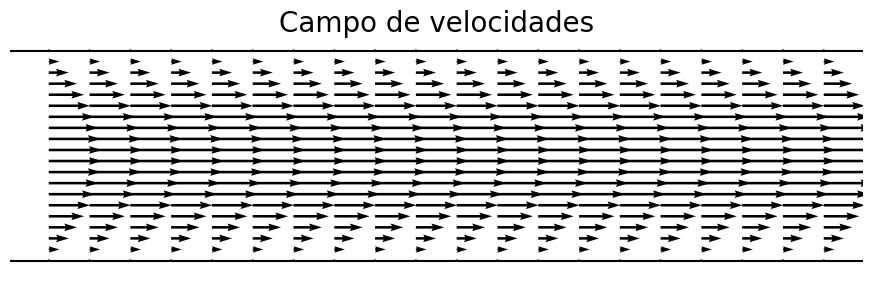

In [ ]:
#Malla rectangular
NG=20
zs=np.linspace(0,L,NG)
xs=np.linspace(-a,a,NG)
ys=np.zeros(NG)

ZS,XS=np.meshgrid(zs,xs)
YS=np.zeros_like(XS)

t=0
VXS=np.zeros_like(XS)
VYS=np.zeros_like(XS)
VZS=np.zeros_like(XS)
for i in range(NG):
  for j in range(NG):
    if XS[i,j]>=-a and XS[i,j]<=a:
      VXS[i,j],VYS[i,j],VZS[i,j]=vfield_tuberia(XS[i,j],YS[i,j],ZS[i,j],
                                                t,vpars)

plt.figure(figsize=(11,3))
plt.title("Campo de velocidades", fontsize= 20)
plt.quiver(ZS,XS,VZS,VXS,scale=40)
plt.axhline(-a,color="black")
plt.axhline(a,color="black")
plt.axis("off")

Para calcular la tasa de descarga volumétrica, es decir, la cantidad de volumen que pasa por la tuberia en unidad de tiempo, se deben tener presentes $\triangle V$ correspondiente al volumen descargado en el tiempo $T$:

$$Q=\frac{\triangle V}{T}$$

Analíticamente, la tasa de descarga se puede halla resolviendo una integral sobre la sección transversal:

\begin{align}
Q&=\int_A \vec{v}\cdot d\vec{S}\\
&=\frac{G}{2\eta}\pi \int_{0}^{a} (a^2-r^2)rdr
\end{align}

Finalmente:

$$\boxed{Q = \frac{\pi a^4}{8\eta}G}$$

Adicionalmente, la velocidad promedio de fluido está dada como el caudal que atraviesa el área transversal:

\begin{align}
U&=\frac{Q}{\pi a^2}\\
\end{align}

$$\boxed{U = \frac{Ga^2}{8\eta}}$$

In [ ]:
def Q(G,a,eta):
  return np.pi*a**4*G/(8*eta)

def U(G,a,eta):
  return G*a**2/(8*eta)

In [ ]:
print(f"""
---------------------------------------
Para el problema que se acaba de resolver,
la tasa de descarga es:

          Q={Q(G,a,eta):.2f}[m³/s]

Y la velocidad promedio del fluido es:

          U={U(G,a,eta):.2f}[m/s]""")


---------------------------------------
Para el problema que se acaba de resolver,
la tasa de descarga es:

          Q=3.93[m³/s]

Y la velocidad promedio del fluido es:

          U=1.25[m/s]


# Referencias
[1] B. Lautrup. Physics of Continuous Matter, Second Edition: Exotic and Everyday Phenomena in the Macroscopic World. CRC Press, 2011, 2nd ed. ISBN: 9781439894200, 1439894205.